# Candlestick Spinning Top

https://www.investopedia.com/terms/s/spinning-top.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Spinning Top

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

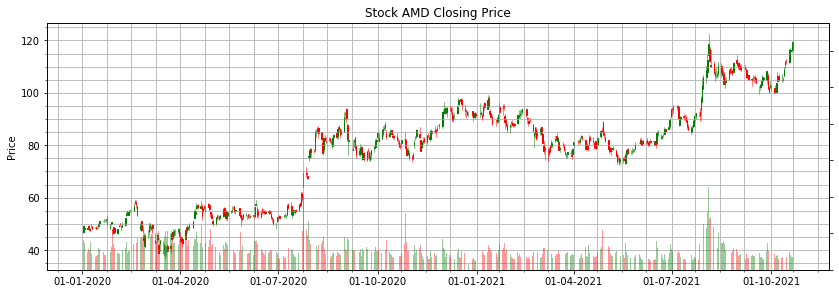

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
spinning_top = talib.CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Close'])

spinning_top = spinning_top[spinning_top != 0]

In [6]:
df['spinning_top'] = talib.CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['spinning_top'] !=0]

,Open,High,Low,Close,Adj Close,Volume,spinning_top
Date,,,,,,,
2020-01-21,50.959999,51.810001,50.700001,51.049999,51.049999,49095000,100
2020-01-22,51.630001,51.880001,51.200001,51.430000,51.430000,40772200,-100
2020-02-04,49.209999,49.750000,48.610001,49.450001,49.450001,46302100,100
2020-02-26,47.700001,49.290001,47.070000,47.490002,47.490002,86378400,-100
2020-03-02,47.419998,47.680000,44.660000,47.459999,47.459999,102324700,100
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,-100
2021-10-11,104.620003,107.199997,104.019997,104.680000,104.680000,31284400,100
2021-10-12,105.169998,106.040001,104.339996,105.040001,105.040001,34039900,-100


In [8]:
df['Adj Close'].loc[df['spinning_top'] !=0]

Date
2020-01-21     51.049999
2020-01-22     51.430000
2020-02-04     49.450001
2020-02-26     47.490002
2020-03-02     47.459999
                 ...    
2021-10-01    102.449997
2021-10-11    104.680000
2021-10-12    105.040001
2021-10-19    116.330002
2021-10-20    116.389999
Name: Adj Close, Length: 84, dtype: float64

In [9]:
df['spinning_top'].loc[df['spinning_top'] !=0].index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-02-04', '2020-02-26',
               '2020-03-02', '2020-03-05', '2020-03-09', '2020-03-18',
               '2020-03-19', '2020-03-27', '2020-05-06', '2020-05-20',
               '2020-06-01', '2020-06-04', '2020-06-05', '2020-06-17',
               '2020-06-19', '2020-06-22', '2020-07-01', '2020-07-17',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-08-05',
               '2020-08-17', '2020-08-21', '2020-09-01', '2020-09-04',
               '2020-09-09', '2020-09-15', '2020-09-30', '2020-10-13',
               '2020-10-15', '2020-10-16', '2020-10-22', '2020-10-26',
               '2020-11-12', '2020-11-23', '2020-12-01', '2020-12-11',
               '2020-12-16', '2020-12-21', '2020-12-24', '2021-01-04',
               '2021-01-25', '2021-01-26', '2021-02-02', '2021-02-10',
               '2021-02-11', '2021-02-18', '2021-02-19', '2021-03-15',
               '2021-03-22', '2021-03-25', '2021-03-29', '2021-04-06',
      

In [10]:
spinning_top

Date
2020-01-21    100
2020-01-22   -100
2020-02-04    100
2020-02-26   -100
2020-03-02    100
             ... 
2021-10-01   -100
2021-10-11    100
2021-10-12   -100
2021-10-19    100
2021-10-20    100
Length: 84, dtype: int32

In [11]:
spinning_top.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-02-04', '2020-02-26',
               '2020-03-02', '2020-03-05', '2020-03-09', '2020-03-18',
               '2020-03-19', '2020-03-27', '2020-05-06', '2020-05-20',
               '2020-06-01', '2020-06-04', '2020-06-05', '2020-06-17',
               '2020-06-19', '2020-06-22', '2020-07-01', '2020-07-17',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-08-05',
               '2020-08-17', '2020-08-21', '2020-09-01', '2020-09-04',
               '2020-09-09', '2020-09-15', '2020-09-30', '2020-10-13',
               '2020-10-15', '2020-10-16', '2020-10-22', '2020-10-26',
               '2020-11-12', '2020-11-23', '2020-12-01', '2020-12-11',
               '2020-12-16', '2020-12-21', '2020-12-24', '2021-01-04',
               '2021-01-25', '2021-01-26', '2021-02-02', '2021-02-10',
               '2021-02-11', '2021-02-18', '2021-02-19', '2021-03-15',
               '2021-03-22', '2021-03-25', '2021-03-29', '2021-04-06',
      

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,spinning_top
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-15,112.510002,112.839996,111.110001,112.120003,112.120003,34177700,0
2021-10-18,111.900002,116.879997,111.370003,116.430000,116.430000,47537800,0
2021-10-19,116.160004,117.169998,114.470001,116.330002,116.330002,39593900,100


Text(0, 0.5, 'Price')

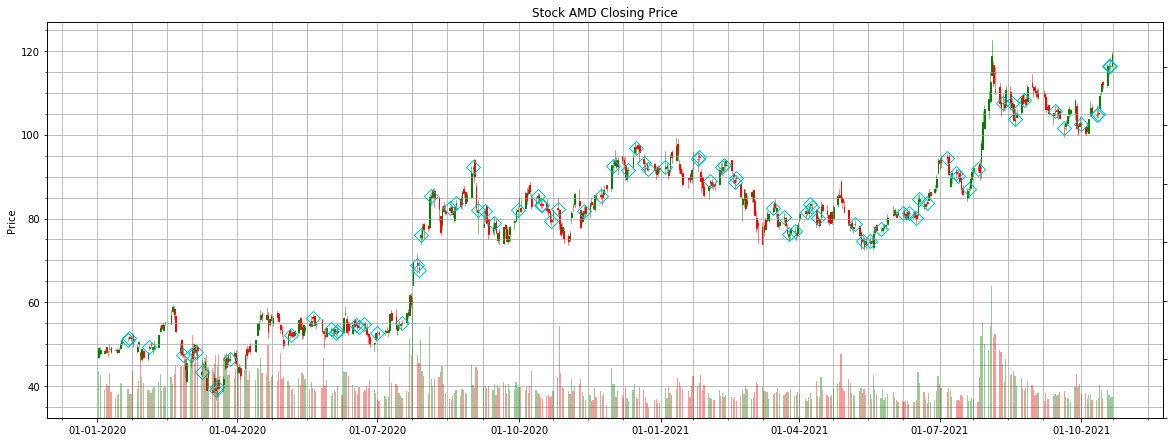

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['spinning_top'] !=0].index, df['Adj Close'].loc[df['spinning_top'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-10-01':'2021-10-22']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,spinning_top,VolumePositive
0,738064.0,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,-100,False
1,738067.0,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0,False
2,738068.0,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0,True
3,738069.0,100.449997,103.720001,100.349998,103.639999,103.639999,39071700,0,True
4,738070.0,104.599998,107.949997,104.459999,106.449997,106.449997,41543100,0,True


Text(0, 0.5, 'Price')

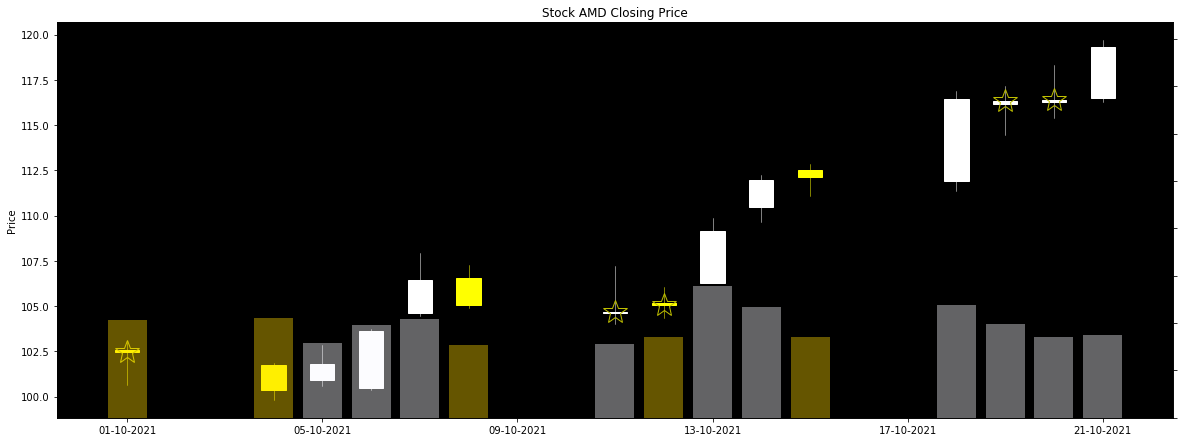

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='white', colordown='yellow', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['spinning_top'] !=0].index, df['Adj Close'].loc[df['spinning_top'] !=0],
                '*y', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'ghostwhite', False: 'gold'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

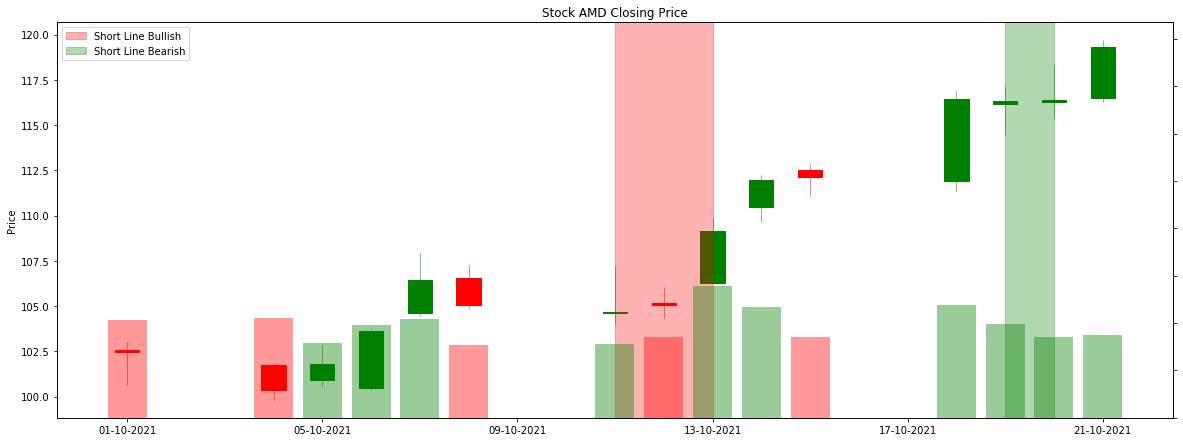

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,10,11)), date2num(datetime(2021,10,13)), 
           label="Short Line Bullish",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2021,10,19)), date2num(datetime(2021,10,20)), 
           label="Short Line Bearish",color="green", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')